### Video Games Dataset: EDA
#### 1. Describe Dataset
- **Who:** The data was acquired from Kaggle and supplied by the user Gregory Smith (https://www.kaggle.com/gregorut/videogamesales). The data was scraped from www.vgchartz.com. 
- **What:** The dataset contains a list of video games with sales greater than 100,000 from 1980 to 2011. It contains information such as the platform the game was made available, year of release, genre, publisher, sales in NA, sales in JP, sales in EU, sales in the rest of the world and global sales (total). The data set also includes the rank of games in terms of overall sales. **NOTE: Sales are in millions**
- **When:** The data set was last updated 4 years ago but contains games released from 1980 to seemingly 2017. 
- **Why:** The video game industry is a very competitive yet profitable industry. While big companies with large amounts of resources have an edge over smaller companies, we have recently seen many small companies finding huge success. Not only in game creation but in the case of streamers for example, playing a game before it becomes mainstream might give you an edge against bigger name streamers. With this data set, we are able to gain insight into general idea such as performance of companies, most popular titles and genres. We are also able to dive deeper and look at changing genre popularities over time, regional preference in game genres/platforms, upcoming developer etc.  
- **How:** The data set was scraped from the www.vgzchartz.com website using BeautifulSoup. The scraping script can be found here (https://github.com/GregorUT/vgchartzScrape)

#### 2. Load Dataset

In [1]:
import pandas as pd
import numpy as np
import altair as alt
# from altair_saver import save
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
game = pd.read_csv("vgsales.csv")

#### 3. Explore Dataset

In [3]:
game.info()

print("\nPlatform:\n",game.Platform.unique(),"\nCount: ",game.Platform.nunique())
print("\nYear\n",game.Year.unique(),"\nCount: ",game.Year.nunique())
print("\nGenre\n",game.Genre.unique(),"\nCount: ",game.Genre.nunique())
print("\nPublishers\n",game.Publisher.unique()[0:15],"\nCount: ",game.Publisher.nunique())

print(game.sort_values("NA_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("EU_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("JP_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("Global_Sales",ascending=False).head(5).iloc[:,0:6])

print(game.groupby("Year").size())
print(game.groupby("Genre").size())
print(game.groupby("Platform").size())

nulls = game[game.isna().any(axis=1)]
nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Platform:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 
Count:  31

Year
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 199

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


#### 4. Initial thoughts?
- We have null values in Year and Publisher (Total of 307 rows with NaN values)
- Year is a float, we could probably turn it into an int to make it prettier
- We have 31 unique Platforms
- We have 39 unique years (one being NaN)
- We have 12 unique genres
- We have 578 unique publishers
- Looking at the top games in each region EU and NA are more similar in taste than JP
    -JP loves their Pokemon
    -Nintendo is the dominating Publisher in all regions 
- Years with the most releases are 2006 to 2011 with a peak of 1431 releases in 2009.

#### 5. Wrangling
The main concern would be the NaN values. In my oppinion, 

In [4]:
#game.Year = game.Year.astype("Int64")
print(nulls.groupby("Year").size())
print(nulls.groupby("Genre").size())
print(nulls.groupby("Platform").size())

Year
2004.0    19
2005.0     5
2007.0     1
2010.0     2
2011.0     3
2012.0     2
2014.0     2
2016.0     2
dtype: int64
Genre
Action          65
Adventure       12
Fighting        12
Misc            53
Platform        11
Puzzle          12
Racing          24
Role-Playing    18
Shooter         28
Simulation      19
Sports          42
Strategy        11
dtype: int64
Platform
2600    17
3DS     10
DS      32
GB       1
GBA     36
GC      14
N64      3
PC      22
PS       7
PS2     34
PS3     25
PSP     16
PSV      3
Wii     35
X360    31
XB      21
dtype: int64


#### 6. Research Questions/Visualization+Analysis

## Aamir Plots

### 1. Top Three Years with Maximum Number of Games released per Genre

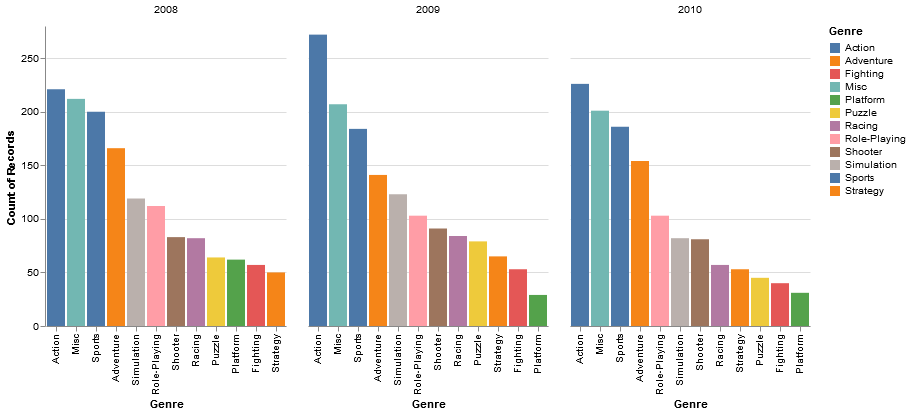

In [5]:
idx = game.groupby(["Year"]).size().nlargest(3).index

alt.Chart(game[game.Year.isin(idx)]).mark_bar().encode(
    x=alt.X('Genre:N',         
            sort=alt.EncodingSortField(field='Genre:N', 
                                       op='count', 
                                       order='descending')),
    y='count(Genre):Q',
    color='Genre:N',
    tooltip=['Genre:N', 
             'Year:O', 
             alt.Tooltip('count(Genre):Q',
                         title='Number of Games Released')]
).facet(
    column=alt.Column('Year:O', 
                      header=alt.Header(title=None)),
).resolve_scale(
    x='independent').configure_view(
    stroke='transparent'
)

### Annual Global Sales Numbers

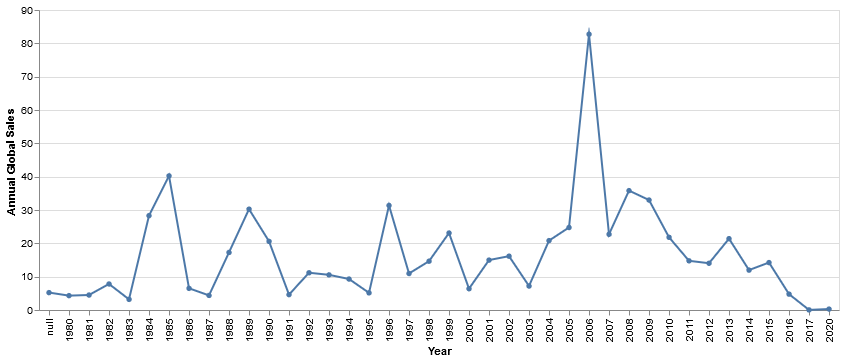

In [6]:
# plt.figure(figsize=(15, 10))
# sns.barplot(x="Year", y="Global_Sales", data=data_year)
# plt.xticks(rotation=90)

alt.Chart(game).mark_line(point=True).encode(
    x='Year:N',
    y=alt.Y('max(Global_Sales):Q', axis=alt.Axis(title='Annual Global Sales'))
)

### Games Popularity per Genre over the Years

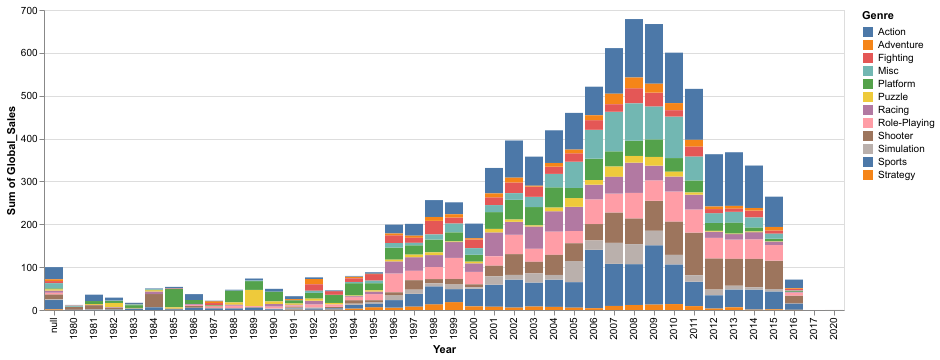

In [93]:
alt.Chart(game).mark_bar().encode(
    x="Year:O",
    y="sum(Global_Sales):Q",
    color="Genre:N"
)

In [89]:
game.groupby('Genre')['Global_Sales'].sum()

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [90]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### 7. Future Studies

In [7]:
sdsdfd

NameError: name 'sdsdfd' is not defined